1. Quin Ã©s el nom de la princesa que ha de salvar Link a 'The Legend of Zelda'?
Escull de quina pregunta vols veure les estadístiques:
2. Quin Ã©s el personatge principal de la saga 'The Witcher'?
Escull de quina pregunta vols veure les estadístiques:
3. Quin Ã©s el nom del famÃ³s fontaner de Nintendo?
Escull de quina pregunta vols veure les estadístiques:
4. Quin joc va guanyar el premi 'Game of the Year' als The Game Awards 2020?
Escull de quina pregunta vols veure les estadístiques:
5. Quin Ã©s el tÃ­tol de la cinquena entrega de la saga 'The Elder Scrolls'?
Escull de quina pregunta vols veure les estadístiques:
6. Quina empresa va desenvolupar el videojoc 'The Elder Scrolls V: Skyrim'?
Escull de quina pregunta vols veure les estadístiques:
7. Quin videojoc va ser el primer a utilitzar grÃ fics poligonals 3D?
Escull de quina pregunta vols veure les estadístiques:
8. Quin joc va popularitzar el gÃ¨nere 'battle royale'?
Escull de quina pregunta vols veure les estadístiques:
9. Quin j

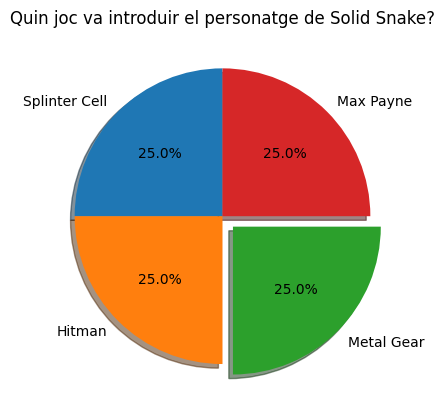

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
from datetime import datetime
import os

warnings.filterwarnings("ignore")
routeData='./data/AllData.json'
today_date = datetime.now().strftime("%d-%m-%Y")
statisticsRoute='./data/GameData.json'

with open(statisticsRoute) as f:
    statisticData = json.load(f)
with open(routeData) as f:
    fulldata = json.load(f)
arrayPreguntesAmbEstadistiques = []
for index in range(len(statisticData["dadesPerPregunta"])):
    auxObject = {}
    for pregunta in fulldata["preguntes"]:
        if pregunta['id'] == statisticData["dadesPerPregunta"][index]['id']:
            auxObject['pregunta'] = pregunta['pregunta']
            auxObject['correcta'] = pregunta["resposta_correcta"]
            auxObject['respostes'] = []
            auxObject['Intentada'] = statisticData["dadesPerPregunta"][index]['intents']
            for resposta in pregunta['respostes']:
                for respostaEstadistica in statisticData["dadesPerPregunta"][index]['respostes']:
                    if resposta == respostaEstadistica['text']:
                        auxObject['respostes'].append({"text":resposta, "escollida":respostaEstadistica['escollida']})
            break
    arrayPreguntesAmbEstadistiques.append(auxObject)

for index in range(len(arrayPreguntesAmbEstadistiques)):
    print(str(index+1) + ". " + arrayPreguntesAmbEstadistiques[index]['pregunta'])
    print("Escull de quina pregunta vols veure les estadístiques:")
option = -1
while option < 0 or option > len(arrayPreguntesAmbEstadistiques)-1:
    option = int(input())-1
    if option < 0 or option > len(arrayPreguntesAmbEstadistiques)-1:
        print("Escull una pregunta vàlida")
pregunta = arrayPreguntesAmbEstadistiques[option]

labels = [resposta['text'] for resposta in pregunta['respostes']]
sizes = [resposta['escollida'] for resposta in pregunta['respostes']]
correct_answer = pregunta['correcta']

explode = (0, 0, 0, 0)
if pregunta['correcta'] == 0:
    explode = (0.1, 0, 0, 0)
elif pregunta['correcta'] == 1:
    explode = (0, 0.1, 0, 0)
elif pregunta['correcta'] == 2:
    explode = (0, 0, 0.1, 0)
elif pregunta['correcta'] == 3:
    explode = (0, 0, 0, 0.1)
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90)



plt.title(f"{pregunta['pregunta']}")






plt.show()

